In [1]:
import yaml
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import index
import plots

# teleconnection config details

diagname  = 'teleconnections'
machine   = 'wilma'

# Opening yml files

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

## NAO

/work/users/mnurisso/mambaforge/envs/aqua/lib/python3.11/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


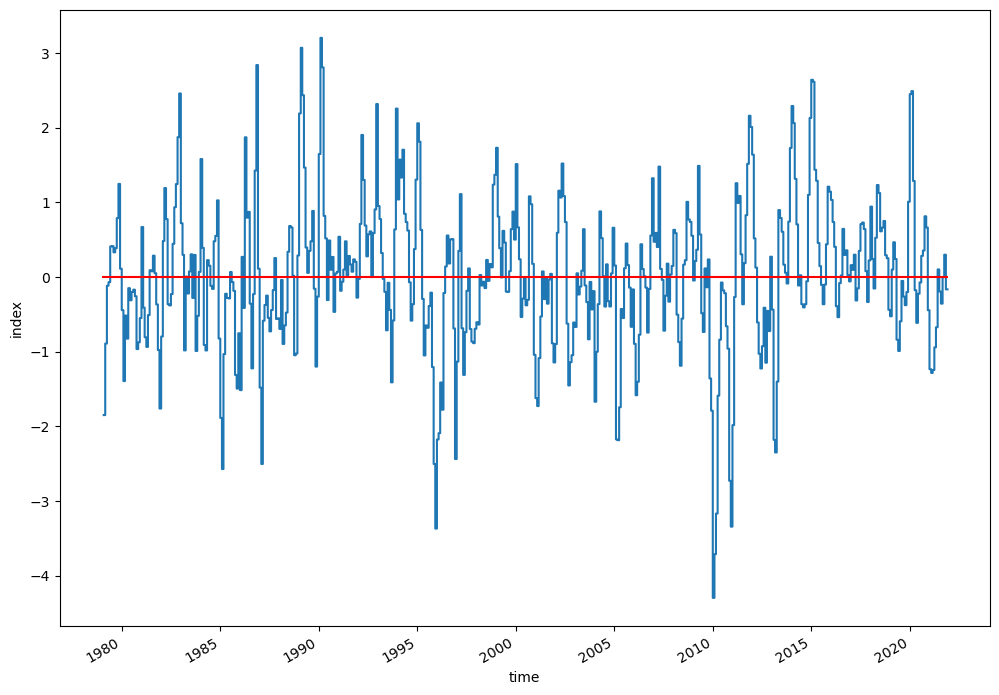

In [2]:
# Configuration specific to the NAO teleconnection
telecname = 'NAO'
fieldname = namelist[telecname]['field']

# Opening dataset file
infile = config[diagname][telecname]['input']
field = xr.open_mfdataset(infile)[fieldname]

# Evaluating NAO
NAO = index.station_based_index(field,namelist,telecname=telecname)
plots.index_plot(NAO)

<xarray.DataArray (lat: 721, lon: 1440)>
dask.array<truediv, shape=(721, 1440), dtype=float64, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0

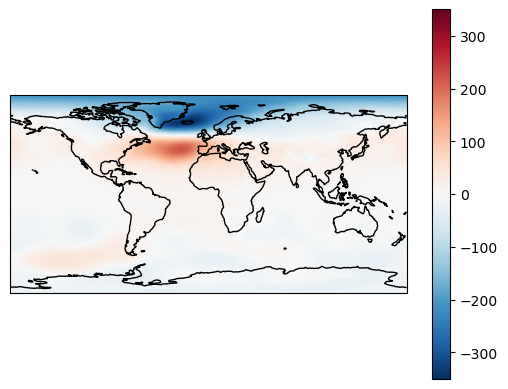

<Figure size 800x400 with 0 Axes>

In [3]:
plots.reg_plot(NAO,field)

## ENSO

skt
/work/datasets/obs/ERA5/skin_temperature/mon/ERA5_skin_temperature_mon_0.25x0.25_sfc_1979-2019.nc


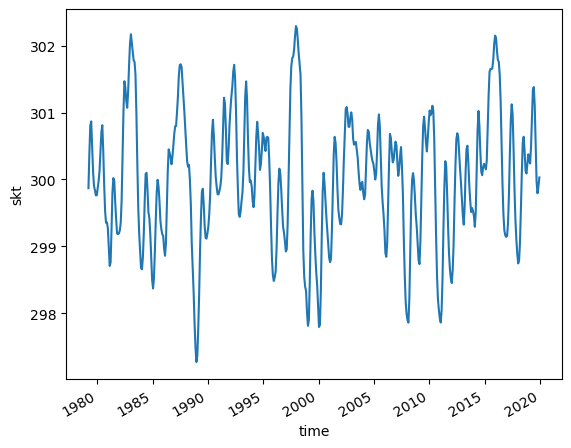

In [3]:
# Configuration specific to the NAO teleconnection
telecname = 'ENSO'
fieldname = namelist[telecname]['field']

# Opening dataset file
infile = config[diagname][telecname]['input']
field = xr.open_mfdataset(infile)[fieldname]

# Evaluating ENSO
ENSO = index.regional_mean_index(field,namelist,telecname)
ENSO.plot()